In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import AgglomerativeClustering

Будем учиться классифицировать жанры музыки. В отличие от проекта, который вас ждет, здесь мы будем работать не с сырыми данными (аудиодорожками), а уже в осмысленными признаками (правда, не все из них имеют понятные названия). Сами данные можно найти [здесь](https://www.kaggle.com/purumalgi/music-genre-classification). Будем использовать файл `train.csv`. Нашей задачей будет предсказание переменной `Class` (жанр песни) при помощи деревьев решений. Можно попробовать также другие методы классификации, которые мы прошли, и сравнить результаты. При обучении всех моделей не забывайте про разделение на тренировку и тест (или кросс валидацию [ссылка](https://www.youtube.com/watch?v=fSytzGwwBVw)).

### Задание 1. EDA (10 баллов)

Как обычно, начнем с того, что посмотрим на наши данные: типы переменных, пропущенные значения, баланс классов и все такое. Ваш ход:

In [75]:
data = pd.read_csv("../data/train.csv")
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [76]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [77]:
data.isna().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [79]:
classes = pd.DataFrame({'amount of elements in class':data.Class.value_counts(),
                        'class':data.Class.value_counts().index}).set_index('class')
print(classes)
classes.describe()

       amount of elements in class
class                             
10                            4949
6                             2587
9                             2524
8                             1854
5                             1447
1                             1373
2                             1272
0                              625
7                              576
3                              402
4                              387


,amount of elements in class
count,11.000000
mean,1636.000000
std,1348.417665
min,387.000000
25%,600.500000
50%,1373.000000
75%,2189.000000
max,4949.000000


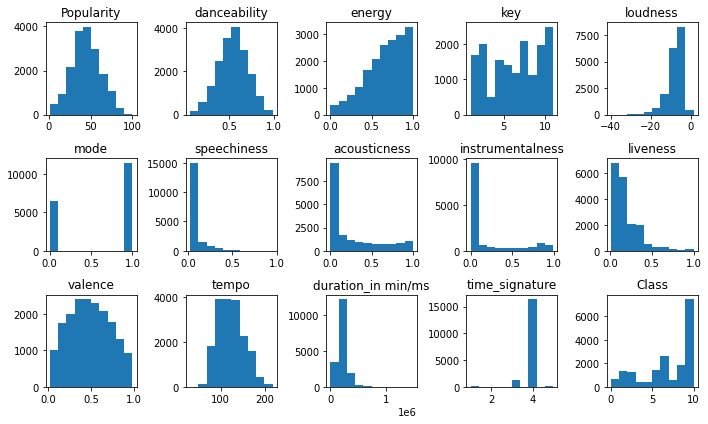

In [80]:
plot_data = data.drop(data.columns[[0,1]], axis=1)
plt.figure(figsize=(10, 6))
for i in range(plot_data.shape[1]):
    plt.subplot(3, 5, i+1)
    plt.tight_layout()
    plt.hist(x=plot_data.iloc[:,[i]])
    plt.title(plot_data.columns[i])
plt.show()

### Задание 2. Обучение дерева решений (10 баллов)

Предобработайте признаки так, чтобы их можно было подать в модель дерева решений и обучите ее, постарайтесь подобрать оптимальные гиперпараметры, которые вам известны. Постарайтесь также обосновать выбор метрики в данном случае. При подборе гиперпараметров может помочь `GridSearchCV` [ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Уберем колонки с именем исполнителя и названием песни, так же колонки `instrumentalness` и `key` посколбку в них много пропущенных значений. В колонке `Popularity` заполним пропущенные значения средним.

In [81]:
data_processed = data.drop(data.columns[[0,1]], axis=1)
data_processed = data_processed.drop(['instrumentalness', 'key'], axis=1)
data_processed = data_processed.fillna({'Popularity': data_processed.Popularity.mean()})

In [82]:
X = data_processed.drop(['Class'], axis=1)
y = data_processed.Class

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [84]:
clf = DecisionTreeClassifier()
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Выбор гиперпараметров

In [96]:
parameters = {'max_depth': range(1, 35, 5),
              'min_samples_split': range(2, 14, 2),
              'min_samples_leaf': range(1, 12, 3),
              'criterion': ['gini', 'entropy']}

search = GridSearchCV(clf, parameters, cv=3)
search.fit(X_train, y_train)
best_tree1 = search.best_estimator_

In [97]:
best_tree1

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4,
                       min_samples_split=8)

Более узкий поиск наилучшего дерева

In [98]:
parameters = {'max_depth': range(1, 12),
              'min_samples_split': range(4, 9),
              'min_samples_leaf': range(2, 9),
              'criterion': ['entropy']}

search = GridSearchCV(clf, parameters, cv=3)
search.fit(X_train, y_train)
best_tree2 = search.best_estimator_

In [99]:
best_tree2

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,
                       min_samples_split=7)

In [100]:
best_clf = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=7, min_samples_leaf=5)
best_clf.fit(X_train, y_train)
predicted_classes = best_clf.predict(X_test)

Оценка качества классификации

В данных есть дисбаланс классов, поэтому для оценки моделей лучше не использовать accuracy, больше подойдет f1

In [101]:
print('multiclass_accuracy:', f1_score(predicted_classes, y_test, average='micro'))

multiclass_accuracy: 0.4519444444444444


Качество классификации даже у самого хорошего дерева не высокое :(

### Задание 3. Другие модели (5 баллов за модель)

Проделайте операции из **Задания 2** с другими известными вам классификаторами. Стало ли лучше?

### kNN

In [91]:
knn_classifier = KNeighborsClassifier(n_neighbors=35)
knn_classifier.fit(X_train, y_train)
predictions = knn_classifier.predict(X_test)

print('multiclass_accuracy:', f1_score(predictions, y_test, average='micro'))

multiclass_accuracy: 0.31


### Linear regression

In [65]:
regression = LinearRegression()

regression.fit(X_train, y_train)
linear_prediction = regression.predict(X_test)
linear_prediction= np.round(linear_prediction)

print('multiclass_accuracy:', f1_score(linear_prediction, y_test, average='micro'))

multiclass_accuracy: 0.1175


### Clustering

In [58]:
clustering = AgglomerativeClustering(n_clusters=11)
prediction = clustering.fit_predict(X_test)

In [73]:
print('multiclass_accuracy:', f1_score(prediction, y_test, average='micro'))

multiclass_accuracy: 0.08


Кажется, задача не из простых. Во всех методах метрика f1 низкая. Но у дерева она лучше, чем у остальных.

### Задание 4. (3 балла)

Раз уж вы работаете в командах, то у вас есть шанс обсудить любимые фильмы. Напишите сюда 3 фильма, которые хотели бы посмотреть вместе:

1.

2.

3.